In [1]:
import numpy as np

In [2]:
solarconstant = 1366 #W/m2
albedo = 0.3
stefanboltzman = 5.670374419e-8 #W/m2/K4

![image.png](attachment:fb0c2beb-0c3a-44c3-821d-2ff8ee3f9836.png)

In [3]:
Te = (solarconstant*(1-albedo)/(4*stefanboltzman))**(1/4)

In [4]:
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (Te, Te-273.15))

Average temperature of the earth is 254.8116 Kelvin or -18.3384 deg C


In [5]:
epsilon = 0.78
T_s = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-epsilon/2))) ** (1/4)
T_a = (epsilon*stefanboltzman*T_s**4 / (2*stefanboltzman)) ** (1/4)

In [6]:
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (T_s, T_s-273.15))

Average temperature of the earth is 288.3280 Kelvin or 15.1780 deg C


In [7]:
deleps = -4 / (stefanboltzman* T_a**4 - stefanboltzman*T_s**4)
deleps

0.016732901066722455

In [8]:
neweps = epsilon + deleps
neweps

0.7967329010667225

In [9]:
T_s_new = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-neweps/2))) ** (1/4)
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (T_s_new, T_s_new-273.15))

Average temperature of the earth is 289.3252 Kelvin or 16.1752 deg C


In [10]:
warming = T_s_new - T_s
print(warming)

0.9972030491054511


In [11]:
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [12]:
M = 1
solarconstant = 1366
albedo = 0.3
stefanboltzman = 5.670374419e-8
heatcapacity = 4.0e8 #J/m2/K

In [13]:
u = np.zeros((M,))

def myfun(t, u): 
    f = np.zeros((M,))
    f[0] = (solarconstant*(1-albedo)/4 - stefanboltzman*(u[0]**4))/heatcapacity
    return f

In [14]:
u0 = np.zeros((M,))
t0 = 0.0

Dt = 60*60*365*24
tmax = 100*Dt
t = np.arange(t0,tmax,Dt)
N = np.shape(t)[0]

In [15]:
sol = solve_ivp(myfun, [t0,tmax],u0, method='RK45', t_eval = t)

Text(0, 0.5, 'Temperature (K)')

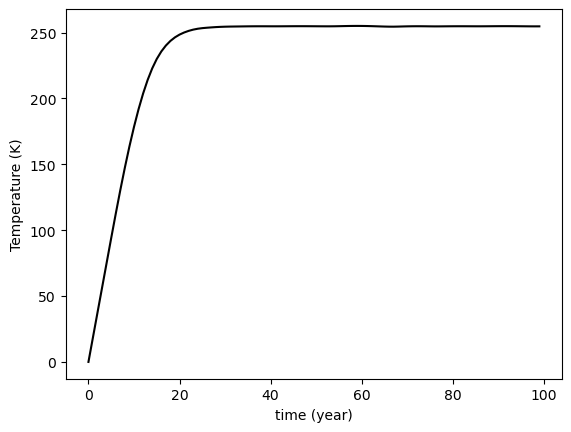

In [16]:
fig = plt.figure()
plt.plot(sol.t/(60*60*365*24),sol.y[0],'k-')
plt.xlabel('time (year)')
plt.ylabel('Temperature (K)')

In [29]:
M = 2 
#u[0] is Ta
#u[1] is Ts

def myfun( t, u): 
    f = np.zeros((M,))
    f[0] = (solarconstant * (1-albedo)/4 - epsilon*stefanboltzman*(u[0]**4) 
            - (1-epsilon)*stefanboltzman*(u[1]**4))/heatcapacity
    f[1] = (solarconstant * (1-albedo)/4 + epsilon*stefanboltzman*(u[0]**4) - 
            stefanboltzman*(u[1]**4))/heatcapacity
    return f
    

In [34]:
# initial conditions
#u0 = np.zeros((M))
u0 = [290,300]

Dt = 60*60*365*24
t0 = 0
tmax = 100*Dt
t = np.arange(t0, tmax, Dt)
N = np.shape(t)[0]


In [35]:
sol = solve_ivp(myfun, [t0, tmax], u0, method='RK45', t_eval=t)

In [36]:
print(sol.y[1])

[300.         304.06172466 304.19363825 302.58909541 300.34665977
 298.11745843 296.1559569  294.52639395 293.14140561 291.98947637
 291.12757531 290.48033285 289.96698714 289.5470269  289.20909322
 288.97044589 288.81429885 288.69983384 288.61025905 288.53465416
 288.4679704  288.4110305  288.37052873 288.35913985 288.38501361
 288.42597418 288.46009829 288.47265541 288.45610774 288.41011024
 288.34151058 288.26434919 288.19985923 288.17646659 288.21973115
 288.29314735 288.37009897 288.43383535 288.47272008 288.48023098
 288.45496015 288.40061392 288.32601289 288.2450919  288.17690003
 288.14560064 288.15155912 288.11013238 288.05951435 288.03802618
 288.06709858 288.15127181 288.27819572 288.4186297  288.52644271
 288.53861329 288.46007564 288.3820116  288.3205719  288.28545758
 288.28036641 288.30299286 288.34502813 288.39216013 288.4240735
 288.41870859 288.42431403 288.44476445 288.4611278  288.46084247
 288.43771733 288.39193173 288.33003546 288.26494881 288.2159625
 288.2087377

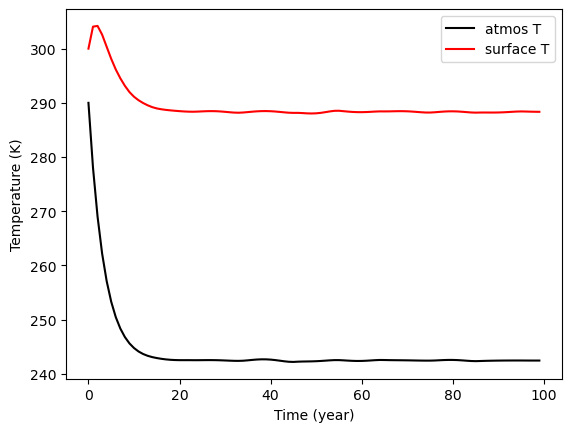

In [37]:
fig = plt.figure()
plt.plot(sol.t / (60*60*365*24), sol.y[0], 'k-', label='atmos T')
plt.plot(sol.t / (60*60*365*24), sol.y[1], 'r-', label='surface T')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')
plt.legend()